In [1]:
#############################################
# Problem 1
#############################################
# (a)
import numpy as np
# the possible number of experiments
E1 = [i for i in range(11)]       #from 0-10
E2 = [i for i in range(6)]        #from 0-5
E3 = [i for i in range(3)]        #from 0-2

# create Fisher matrix with number of experiments as inputs
def Fisher_Likelihood(n1, n2, n3):
    # variance for each experiment
    var1 = ((4*1+2)*0.2)**2         
    var2 = ((4*2+2)*0.15)**2
    var3 = ((4*5+2)*0.1)**2
    F = np.zeros((2,2))
    F[0,0] = n1/var1 + 4*n2/var2 + 25*n3/var3
    F[0,1] = n1/var1 + 2*n2/var2 + 5*n3/var3
    F[1,0] = F[0,1]
    F[1,1] = n1/var1 + n2/var2 + n3/var3
    return F

# Calculate variance
def Covariance():
    e1 = []
    e2 = []
    e3 = []
    var_alph = []
    var_beta = []
    
    for n1 in E1:
        for n2 in E2:
            for n3 in E3:
                # create Fisher Matrix
                F = Fisher_Likelihood(n1,n2,n3)
                # calculate determinant
                det = np.linalg.det(F)
                # condition 1 determinant not 0
                # condition 2 under budget
                if n1+2*n2+3*n3<=10 and det != 0:
                    # calculate covariance matrix by inversing Fisher Matrix
                    Cov = np.linalg.inv(F)
                    # two conditions of possible outcomes
                    if n3>0 and n2>0 and n1>0:
                        e1.append(n1)             # append # of first expr.
                        e2.append(n2)             # append # of second expr.
                        e3.append(n3)             # append # of third expr.
                        var_alph.append(Cov[0,0]) # append variance of alpha
                        var_beta.append(Cov[1,1]) # append variance of beta
                    if n3 == 0:
                        e1.append(n1)
                        e2.append(n2)
                        e3.append(n3)
                        var_alph.append(Cov[0,0])
                        var_beta.append(Cov[1,1])
    
    # find the minimum variance
    # find the index of the min
    # print min
    # print n1 n2 and n3
    # print corresponding Fisher matrix
    var_a = np.min(var_alph)
    ind_a = var_alph.index(var_a)
    print ("The minimum variance of alpha is ", var_a)
    print ("With the number of experiments are ", e1[ind_a], e2[ind_a], e3[ind_a])
    print (Fisher_Likelihood(e1[ind_a], e2[ind_a], e3[ind_a]))
    print ("*"*50)
    var_b = np.min(var_beta)
    ind_b = var_beta.index(var_b)
    print ("The minimum variance of beta is", var_b)
    print ("With the number of experiments are ", e1[ind_b], e2[ind_b], e3[ind_b])
    print (Fisher_Likelihood(e1[ind_b], e2[ind_b], e3[ind_b]))
Covariance()

The minimum variance of alpha is  0.1961559020044544
With the number of experiments are  2 1 2
[[13.49724518  4.34389348]
 [ 4.34389348  2.24655647]]
**************************************************
The minimum variance of beta is 0.7521108859826859
With the number of experiments are  5 1 1
[[10.41528926  5.39416896]
 [ 5.39416896  4.12327824]]


In [5]:
# (b)
# calculate standard deviation of alpha and beta
sigma1 = 0.1 * 4
sigma2 = 0.2 * 2

# create prior matrix 
def F_prior(sigma1, sigma2):
    F_p = np.zeros((2,2))
    F_p[0,0] = sigma1**2
    F_p[1,1] = sigma2**2
    F_p = np.linalg.inv(F_p)
    return F_p

F_p = F_prior(sigma1, sigma2)

# same as Covariance(), difference as indicated below
def new_Covariance():
    e1 = []
    e2 = []
    e3 = []
    var_alph = []
    var_beta = []
    
    for n1 in E1:
        for n2 in E2:
            for n3 in E3:
                F = Fisher_Likelihood(n1,n2,n3)
                
                # new Fisher matrix
                F = F + F_p
                det = np.linalg.det(F)
                if n1+2*n2+3*n3<=10 and det != 0:
                    Cov = np.linalg.inv(F)
                    if n3>0 and n2>0 and n1>0:
                        e1.append(n1)
                        e2.append(n2)
                        e3.append(n3)
                        var_alph.append(Cov[0,0])
                        var_beta.append(Cov[1,1])
                    if n3 == 0:
                        e1.append(n1)
                        e2.append(n2)
                        e3.append(n3)
                        var_alph.append(Cov[0,0])
                        var_beta.append(Cov[1,1])
    
    var_a = np.min(var_alph)
    ind_a = var_alph.index(var_a)
    print ("The minimum variance of alpha is ", var_a)
    print ("With the number of experiments are ", e1[ind_a], e2[ind_a], e3[ind_a])
    # modified
    print (Fisher_Likelihood(e1[ind_a], e2[ind_a], e3[ind_a])+F_p)
    print ("*"*50)
    var_b = np.min(var_beta)
    ind_b = var_beta.index(var_b)
    print ("The minimum variance of beta is", var_b)
    print ("With the number of experiments are ", e1[ind_b], e2[ind_b], e3[ind_b])
    # modified
    print (Fisher_Likelihood(e1[ind_b], e2[ind_b], e3[ind_b])+F_p)
    
new_Covariance()


The minimum variance of alpha is  0.05705673466547477
With the number of experiments are  2 1 2
[[19.74724518  4.34389348]
 [ 4.34389348  8.49655647]]
**************************************************
The minimum variance of beta is 0.10482758620689656
With the number of experiments are  10 0 0
[[13.19444444  6.94444444]
 [ 6.94444444 13.19444444]]


[0.018287394340316065, 0.05705673466547477, 0.11503785739037974, 0.19272671331214508]
[0.034666666666666665, 0.10482758620689656, 0.17899441340782127, 0.25212121212121213]


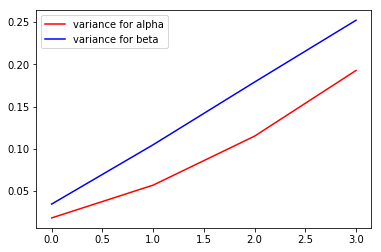

In [9]:
# (c)
# original values for alpha and beta
alp = 4
bet = 2

# define function to calculate variance for different values of alpha and beta 
def Fisher_Likelihood(alpha, beta, n1, n2, n3, a):
    # calculate variance 
    var1 = ((alpha*1+beta)*0.20)**2
    var2 = ((alpha*2+beta)*0.15)**2
    var3 = ((alpha*5+beta)*0.10)**2
    sig1 = 0.1*alpha
    sig2 = 0.2*beta
    var = []
    
    # calculate Fisher matrix for different values of alpha and beta
    # calculate F_prior matrix for different values of alpha and beta
    # inverse of Fisher matrix and get 
    for i in range(len(var1)):
        F = np.zeros((2,2))
        F[0,0] = n1/var1[i] + 4*n2/var2[i] + 25*n3/var3[i]
        F[0,1] = n1/var1[i] + 2*n2/var2[i] + 5*n3/var3[i]
        F[1,0] = F[0,1]
        F[1,1] = n1/var1[i] + n2/var2[i] + n3/var3[i]
        F_p = F_prior(sig1[i], sig2[i])
        F = F + F_p
        va = np.linalg.inv(F)
        var.append(va[a,a])
    return var


alpha = np.linspace(alp/2,alp*2,4)  # the possible values for alpha
beta = np.ones(4)*2
var1 = Fisher_Likelihood(alpha, beta, 2, 1, 2, 0)
print (var1)

beta  = np.linspace(bet/2,bet*2,4)   # the possible values for beta 
alpha = np.ones(4)*4
var2 = Fisher_Likelihood(alpha, beta, 10, 0 ,0, 1)
print (var2)


import matplotlib.pyplot as plt
plt.plot(var1,"r", label="variance for alpha")
plt.plot(var2,"b", label="variance for beta")
plt.legend()
plt.show()

maximum value of Log-likelihood function is  22020.52400507233
v0 =  1845.4545454545455
k =  1.1980396079215843e-23


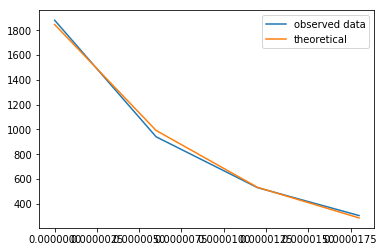

In [10]:
#############################################
# Problem 2
#############################################
# (a)
pi = np.pi
r  = 0.52e-6
rho= 0.063*1e-3/(1e-2)**3
T  = 293
g  = 9.80
n  = np.array([1880, 940, 530, 305])
z  = np.array([0,6,12,18])
z  = z*1e-6

coeff = 4*pi*r**3*rho*g/(3*T)

# define function for v(z)
def V_z(v0, coeff, k, z):
    v = v0 * np.exp(-coeff*z/k)   
    return v

# define log likelihood function
def log_lik(v0, coeff, k, z, n):
    logL = 0
    for i in range(len(n)):
        logL += n[i]*np.log(V_z(v0, coeff, k, z[i]))-V_z(v0, coeff, k, z[i])
    return logL

# tried several ranges and found the max will be located in this range
V0 = np.linspace(1840,1860,100)
K  = np.linspace(1e-23, 1e-22, 5000)
mat = []
v = []
ka = []
for v0 in V0:
    for k in K:
        v.append(v0)
        ka.append(k)
        # calculate log likelihood function with different v0 and k
        # and append to mat
        mat.append(log_lik(v0, coeff, k, z, n))

# find max value in mat
a = np.max(mat)
print ("maximum value of Log-likelihood function is ", a)
# find index 
ind = mat.index(a)
# find corresponding v0 and k
print ("v0 = ", v[ind])
print ("k = ", ka[ind])

# calculate V(z) with corresponding v0 and k using z[i]
# plot observation and prediction

v = V_z(v[ind], coeff, ka[ind], z)

plt.plot(z,n,label="observed data")
plt.plot(z,v,label="theoretical")
plt.legend()
plt.show()


In [11]:
# (b)
# I first converted value of R to the value that can be directly calculated in the equation
R = 8.314
k = ka[ind]
N_A = R/k
print (N_A)

6.939670395725497e+23


minimum of chi-square is  4.570414941850355
v0 =  1846.7336683417086
k =  1.1981981981981981e-23


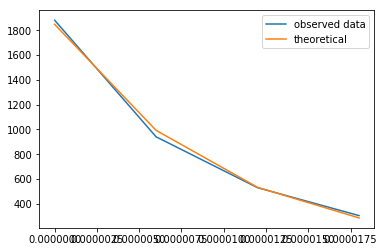

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


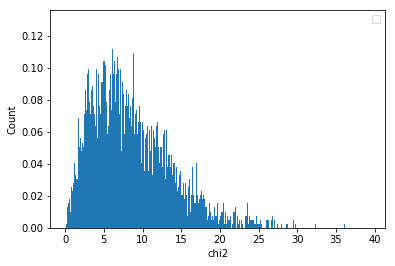

p-value =  0.7644999999999953


In [12]:
# (c)
# define chi-square function
def chi_square(v0, coeff, k, z, n):
    chi2 = 0
    for i in range(len(z)):
        chi2 += (n[i]-V_z(v0, coeff, k, z[i]))**2/V_z(v0, coeff, k, z[i])
    return chi2

# again define the range of v0 and k
V0 = np.linspace(1800,1900,200)
K  = np.linspace(1e-23, 1e-22, 1000)
mat = []
v = []
ka = []
for v0 in V0:
    for k in K:
        v.append(v0)
        ka.append(k)
        mat.append(chi_square(v0, coeff, k, z, n))

# find min chi-square
chi_min = np.min(mat)
print ("minimum of chi-square is ", chi_min)
# find index
ind = mat.index(chi_min)
print ("v0 = ", v[ind])
print ("k = ", ka[ind])

# calculate v(z) using v0 and k found from chi-square 
# and plot the same thing as (b)
v = V_z(v[ind], coeff, ka[ind], z)

plt.plot(z,n,label="observed data")
plt.plot(z,v,label="theoretical")
plt.legend()
plt.show()

# the last task is like what we did in HW4
# simulate poisson distribution with mean v(z) by MC 10000 times
# calculate chi-square and attaches to chi2
# integrate(sum) chi-square distribution
from scipy.stats import chisquare
mc = np.zeros(len(z))
chi2 = []
for i in range(10000):
    for j in range(len(z)):
        mc[j] = np.random.poisson(v[j], 1)
    chi = chisquare(mc, f_exp = n)[0]
    chi2.append(chi)

count, bins, ignored = plt.hist(chi2, 1000, normed=True)
plt.legend()
plt.xlabel("chi2")
plt.ylabel("Count")
plt.show()

lis = []

for i in range(1000):
    if bins[i] >= chi_min:
        lis.append(count[i])

print ("p-value = ",np.sum(lis)*(bins[50]-bins[49]))